# Problem Statement: 
Lithionpower is the largest provider of electric vehicle batteries.
It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company. Lithionpower has a variable pricing model based on the driver's driving history. Battery life depends on factors like overspeeding, distance driven per day, and so on.

# Objective: 
Create a cluster model where drivers can be grouped together based on their driving data. Group the data points so that drivers will be incentivized based on the cluster.

# Data Dictionary
For the sake of simplicity, you will take only two features such as mean distance driven per day and the mean percentage of time when a driver was more than 5 mph over the speed limit.

Here are what the data represent:

id: Unique ID of the driver
mean_dist_day: Mean distance driven by driver per day
mean_over_speed_perc: Mean percentage of time when a driver was more than 5 mph over the speed limit


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
vehicle = pd.read_csv("driver-data (1).csv")
vehicle.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [8]:
vehicle.columns

Index(['id', 'mean_dist_day', 'mean_over_speed_perc'], dtype='object')

# Data Prearation
* Data Cleaning
* lets check the null values.

In [9]:
vehicle.isnull().sum(axis=0)

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

hence there are no null values, therefore we can proceed ahead 

In [10]:
# Lets check the data type
vehicle.dtypes

id                        int64
mean_dist_day           float64
mean_over_speed_perc      int64
dtype: object

# Visualize the data points.

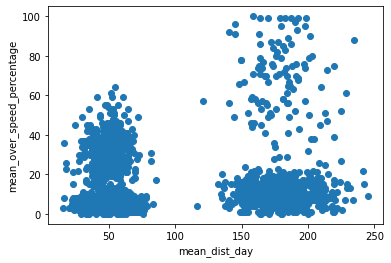

In [14]:
plt.scatter(vehicle['mean_dist_day'],vehicle['mean_over_speed_perc'])
plt.xlabel("mean_dist_day")
plt.ylabel("mean_over_speed_percentage")
plt.show()

Interpretation: wecan see the scatterness in the data points hence required to create the cluster by using K_Means Clusterng Method

In [16]:
from sklearn.cluster import KMeans

In [17]:
km=KMeans(n_clusters=3) # we need to predifined the cluster before model prediction
y_predict =km.fit_predict(vehicle[['mean_dist_day','mean_over_speed_perc']])

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
y_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [20]:
# lets check the uniqueness in the prediction
np.unique(y_predict)

array([0, 1, 2], dtype=int32)

In [28]:
# lets add predict cluster name in the column set in the dataset
vehicle['cluster']=y_predict

In [29]:
vehicle.head()

,id,mean_dist_day,mean_over_speed_perc,Cluster,cluster
0,3423311935,71.24,28,0,0
1,3423313212,52.53,25,0,0
2,3423313724,64.54,27,0,0
3,3423311373,55.69,22,0,0
4,3423310999,54.58,25,0,0


In [30]:
vehicle.sample(5)

,id,mean_dist_day,mean_over_speed_perc,Cluster,cluster
1214,3423313771,42.00,8,0,0
687,3423313369,53.75,8,0,0
2739,3423310579,65.60,6,0,0
136,3423311470,61.67,50,0,0
783,3423311656,42.75,4,0,0


# Get the coordinates of cluster Centers

In [31]:
km.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154]])

# plot the clusters with their centroids

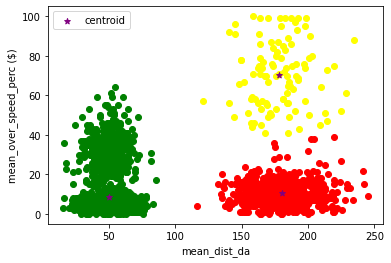

In [33]:
# here we have n_cluster =3 therefore, we need to define three dataset 0,1,2
df1= vehicle[vehicle.cluster==0]
df2= vehicle[vehicle.cluster==1]
df3= vehicle[vehicle.cluster==2]

plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'],color='green')
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'],color='red')
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'],color='yellow')


plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('mean_dist_da')
plt.ylabel('mean_over_speed_perc ($)')
plt.legend()

In [42]:
# lets check our assumption of making cluster is correct using elbow method
sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(vehicle[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [43]:
# lets check sse
sse

[12184626.12962798,
 1316420.8509477177,
 992634.0606702471,
 719603.9690822503,
 534675.0545621562,
 372841.1452326999,
 319750.0505369911,
 276961.48247100855,
 252615.12344189786]

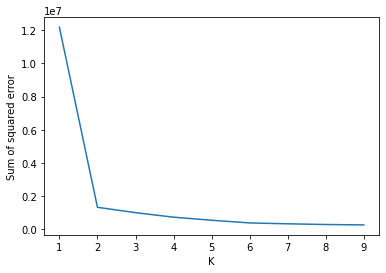

In [44]:
# lets plot the elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Interpretation: we can see that 2 has the cluster range and our cluster n=3 which is approx correct and there will be no change of overfitting/underfitting of data points